
                   Data analysis of precovid and post covid pollution in the world(prefrably India)

In [3]:
from pandas import read_csv
from numpy import nan
import seaborn as sns
import matplotlib as mplt
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd




In [4]:

file= read_csv('outdoor-pollution-death-rate.csv')
file1=read_csv('region_pollution.csv')

df_ind=file[2660:2688]#decerease top with 2 and bottom with 1
df_us=file[4143:4171]
df_spain=file[5375:5403]
df_italy=file[2828:2856]
df_china=file[1260:1288]
df_rus =file[4675:4703]
df_iran=file[2716:2744]
df_fra=file[2044:2072]
df_aus=file[308:336]
df_ger=file[2156:2184]
df_bangla=file[458:476]
df_jap=file[2884:2912]
df_nor_ko=file[4171:4199]

fi_country=[df_ind,df_us,df_spain,df_italy,df_china,df_rus,df_iran,df_fra,df_aus,df_ger,df_bangla,df_jap,df_nor_ko]

df_main=pd.DataFrame()





#df_ind.describe()



In [5]:
#df=file.head(n=280)
#new_df=pd.DataFrame()
#df_main.head()

for i in fi_country:
    df_main=pd.concat([df_main,i],ignore_index=True)

df_main.describe()

,Year,"Outdoor air pollution death rates (deaths per 100,000)"
count,354.000000,354.000000
mean,2003.754237,42.935311
std,8.043018,25.497525
min,1990.000000,10.570000
25%,1997.000000,20.970000
50%,2004.000000,30.000000
75%,2011.000000,68.367500
max,2017.000000,92.660000


In [6]:
print((df_main.isnull()).sum())
#df_main.head

Entity                                                     0
Code                                                      28
Year                                                       0
Outdoor air pollution death rates (deaths per 100,000)     0
dtype: int64


file.isnull().sum()

In [7]:
df_main['Entity'].value_counts()


Australia        28
Iran             28
North Korea      28
Spain            28
Germany          28
Japan            28
Russia           28
France           28
North America    28
China            28
Italy            28
India            28
Bangladesh       18
Name: Entity, dtype: int64

In [8]:
df_main.drop('Code',axis=1)

,Entity,Year,"Outdoor air pollution death rates (deaths per 100,000)"
0,India,1990,82.98
1,India,1991,83.55
2,India,1992,84.20
3,India,1993,82.98
4,India,1994,82.28
...,...,...,...
349,North Korea,2013,69.01
350,North Korea,2014,67.16
351,North Korea,2015,68.78
352,North Korea,2016,63.47


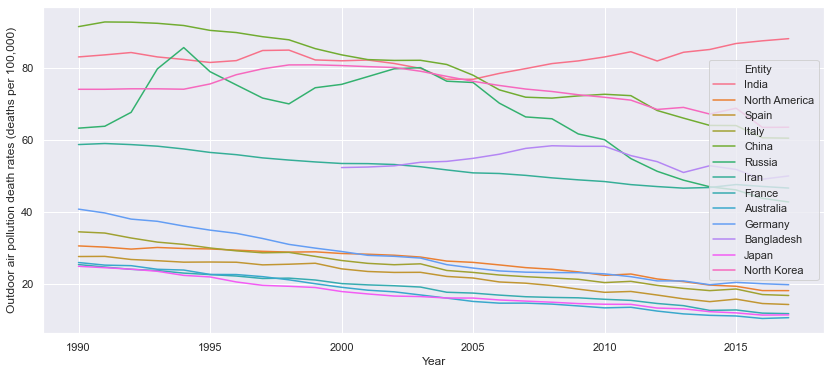

In [9]:
%matplotlib inline
sns.set(style="darkgrid")
plt.subplots(figsize=(14,6))
ax=sns.lineplot(x="Year", y="Outdoor air pollution death rates (deaths per 100,000)",hue='Entity',data=df_main)



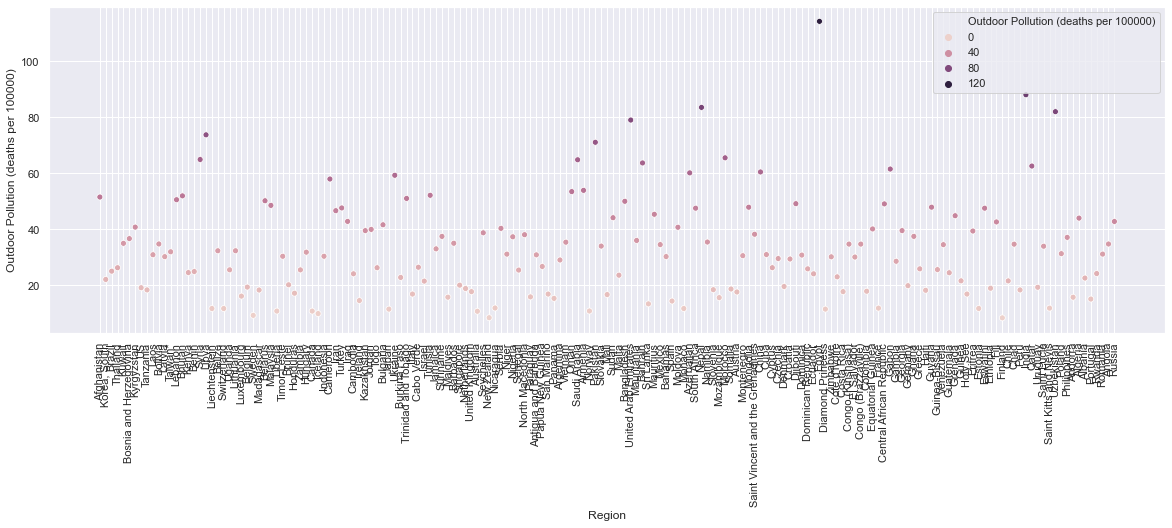

In [55]:

plt.subplots(figsize=(20,6))
sns.scatterplot(x=file1['Region'],y=file1['Outdoor Pollution (deaths per 100000)'],data=file1,hue='Outdoor Pollution (deaths per 100000)')

#for i in file1['Outdoor Pollution (deaths per 100000)']:
#    if i>40:
#        sns.scatterplot(x=file1[file1['Outdoor Pollution (deaths per 100000)']==i]['Region'], y=i,palette='black')
    

degrees = 90
ax.tick_params(direction='out', length=6, width=2, colors='r',
               grid_color='b', grid_alpha=0.5)
plt.xticks(rotation=degrees)
plt.show()


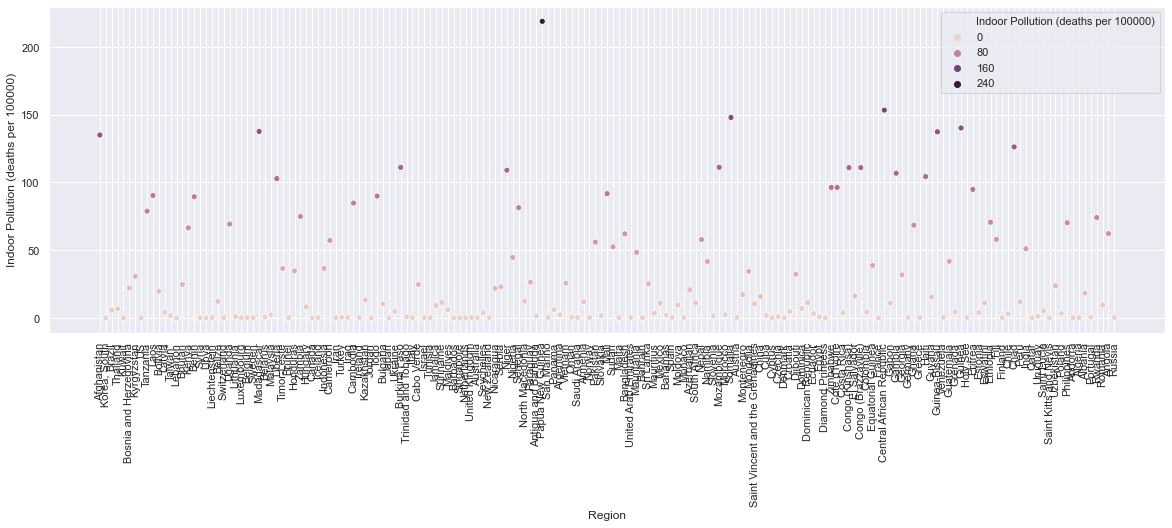

In [54]:

plt.subplots(figsize=(20,6))
sns.scatterplot(x=file1['Region'],y=file1['Indoor Pollution (deaths per 100000)'],data=file1,hue='Indoor Pollution (deaths per 100000)')
degrees = 90
plt.xticks(rotation=degrees)
plt.show()


In [81]:
aqi_emission=pd.read_excel('aqi.xlsx',ignore_index=True)
aqi_emission.to_csv('your_csv.csv', encoding='utf-8')
pd.array(pd.array(aqi_emission['Current AQI value'],dtype="Int64"))



ValueError: invalid literal for int() with base 10: 'NAN'

In [75]:
aqi_emission.to_numeric(aqi_emission['Current AQI value'])
aqi_emission.head()

AttributeError: 'DataFrame' object has no attribute 'to_numeric'

In [74]:
aqi_emission.describe()

,S.No
count,100.000000
mean,50.500000
std,29.011492
min,1.000000
25%,25.750000
50%,50.500000
75%,75.250000
max,100.000000


In [73]:
sns.lineplot(x="Month", y="Current AQI value",hue='Month',data=aqi_emission)

DataError: No numeric types to aggregate